# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [27]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()
par = model.par
sol = model.sol

# Question 1

**Explain how you solve the model**
1) We import the model1 from HouseholdSpecializationModelClass()
2) We create lists of alpha and sigma values 
3) We create an empty list for relative_hours worked
4) We solve the model for different combinations of alpha and sigmas by calling the solve_discrete def in ModelClass
5) We determine relative hours worked in the home by dividing optimal hours for females by optimal hours for males
6) We put relative hours into the empty list.
7) We put relative hours into a dataframe and make it into a latex table

In [29]:
from inauguralproject import HouseholdSpecializationModelClass
model1 = HouseholdSpecializationModelClass()
par = model1.par
sol = model1.sol

In [30]:
# Run loop for different combinations of sigma and alpha
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5,1.0,1.5]
relative_hours_1 = {}

for sigma in sigma_list:
    par.sigma = sigma
    for alpha in alpha_list:
        par.alpha = alpha
        opt = model1.solve_discrete()
        
        relative_hours_1[sigma,alpha] = opt.HF/opt.HM

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  H = (  (1-par.alpha)  * (HM+0.00000000001) **(power) + par.alpha * (HF+0.0000000001)**(power)  )**(1/power)
/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:76: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In [31]:
df = pd.DataFrame(list(relative_hours_1.items()), columns=['(sigma,alpha)', 'Relative hours'])
df[['sigma', 'alpha']] = pd.DataFrame(df['(sigma,alpha)'].tolist(), index=df.index)
df.drop('(sigma,alpha)', axis=1, inplace=True)
df = df.reindex(columns=['sigma', 'alpha', 'Relative hours'])

print(df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 sigma &  alpha &  Relative hours \\
\midrule
   0.5 &   0.25 &        0.545455 \\
   0.5 &   0.50 &        1.000000 \\
   0.5 &   0.75 &        1.833333 \\
   1.0 &   0.25 &        0.307692 \\
   1.0 &   0.50 &        1.000000 \\
   1.0 &   0.75 &        3.250000 \\
   1.5 &   0.25 &        0.214286 \\
   1.5 &   0.50 &        1.000000 \\
   1.5 &   0.75 &        4.666667 \\
\bottomrule
\end{tabular}



/var/folders/fj/trr23jhx25j8_78nf00613400000gn/T/ipykernel_1138/2560377024.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


# Question 2

# Explain your code and procedure
1) We import the model2 from HouseholdSpecializationModelClass()
2) We create a list of wages 
3) We create an empty list for relative_hours and log_relative_hours worked
4) We solve the model for different values of female wages by calling the solve_discrete def in ModelClass
5) We determine relative hours worked in the home by dividing optimal hours for females by optimal hours for males. Afterwards, we take the log
6) We put relative hours into the empty list.
7) We put relative hours into a dataframe and make it into a latex table
8) We make a figure

In [32]:
from inauguralproject import HouseholdSpecializationModelClass
model2 = HouseholdSpecializationModelClass()
par = model2.par
sol = model2.sol
model2.solve_wF_vec(discrete=True) # solve model  
lH_vec_disc = par.lH_vec.copy() # store results 

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:76: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


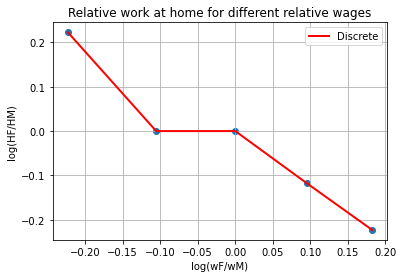

In [51]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_disc, color='red', lw=2,label="Discrete")
ax.scatter(par.lw_vec,lH_vec_disc)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

# Question 3

Explain your code and procedure

In [34]:
from inauguralproject import HouseholdSpecializationModelClass
model3 = HouseholdSpecializationModelClass()
par = model3.par
sol = model3.sol
model3.solve_wF_vec(discrete=False) #solve model
lH_vec_cont = par.lH_vec.copy() # store results       

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


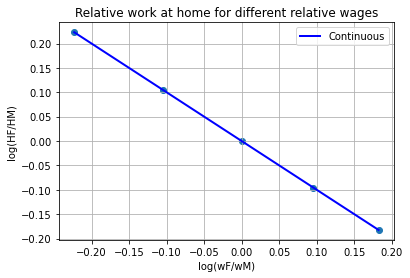

In [50]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_cont, color='blue', lw=2,label="Continuous")
ax.scatter(par.lw_vec,lH_vec_cont)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

# Question 4

In [39]:
from inauguralproject import HouseholdSpecializationModelClass
model4 = HouseholdSpecializationModelClass()
par = model4.par
sol = model4.sol

In [37]:
model4.estimate(do_print=True)

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  power = (par.sigma - 1)/par.sigma


Optimization terminated successfully.
alpha_hat: 0.9820
sigma_hat: 0.1000
beta0_hat: 0.4000
beta1_hat: -0.1000
Termination value: 0.0000


In [45]:
par.alpha = 0.9820
par.sigma = 0.10
model4.solve_wF_vec(discrete=False) #solve model
lH_vec_cont_2 = par.lH_vec.copy() # store results     
lH_vec_cont_2 


/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


array([0.42223962, 0.41045584, 0.39991779, 0.39039148, 0.38168929])

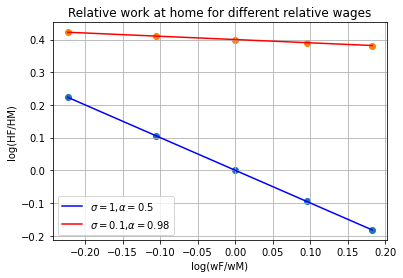

In [49]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_cont, color='blue',label=fr"$\sigma=1$,$\alpha=0.5$")
ax.plot(par.lw_vec, lH_vec_cont_2, color='red',label=fr"$\sigma=0.1$,$\alpha=0.98$")
ax.scatter(par.lw_vec,lH_vec_cont)
ax.scatter(par.lw_vec,lH_vec_cont_2)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

In [15]:
distance = {}

for sigma in sigma_list:
    for alpha in alpha_list:
        dist = model4.estimate(alpha=alpha,sigma=sigma)
        
        distance[sigma,alpha] = dist

In [ ]:
# Convert the distance dictionary into three separate lists
sigmas = []
alphas = []
distances = []
for key, value in distance.items():
    sigmas.append(key[0])
    alphas.append(key[1])
    distances.append(value)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(sigmas, alphas, distances)

# Add labels to the axes
ax.set_xlabel('Sigma')
ax.set_ylabel('Alpha')
ax.set_zlabel('Distance')

# Display the plot
plt.show()

In [ ]:
alpha_grid,sigma_grid = np.meshgrid(alphas,sigmas,indexing='ij')
error_grid = np.meshgrid(distances,np.zeros,indexing='ij')


In [ ]:
from matplotlib import cm # for colormaps
# evaluate utility function
alpha_grid,sigma_grid = np.meshgrid(alphas,sigmas,indexing='ij')
error_grid = distances

# write your code here
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha_grid, sigma_grid,error_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$\alpha$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$Errors$')

# c. invert xaxis
ax.invert_xaxis()

In [ ]:
min_dist = float('inf')
min_alpha = None
min_sigma = None

for key, value in distance.items():
    if value < min_dist:
        min_dist = value
        min_alpha = key[1]
        min_sigma = key[0]

print(f"The minimum distance is {min_dist} for alpha={min_alpha} and sigma={min_sigma}")

In [ ]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), log_relative_hours_3, color='red', lw=2, label=fr"$\sigma=1$,$\alpha=0.5$")
ax.scatter(np.log(par.wF_vec),log_relative_hours_3)

ax.plot(np.log(par.wF_vec), log_relative_hours_41, color='blue', lw=2, label=fr"$\sigma=0.15$,$\alpha=0.9$")
ax.scatter(np.log(par.wF_vec),log_relative_hours_41)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
ax.legend()
plt.show()

# Question 5


In [16]:
from inauguralproject import HouseholdSpecializationModelClass
model5 = HouseholdSpecializationModelClass()

In [19]:
model5.estimate_2(do_print=True)

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  power = (par.sigma - 1)/par.sigma


Optimization terminated successfully.
sigma_hat: 0.0816
kappa_hat: 0.4916
beta0_hat: 0.4125
beta1_hat: -0.0020
Termination value: 0.0098
